# The Discrete Fourier Transform

Fourier analysis is a family of mathematical techniques, all based on decomposing signals into sinusoids. The discrete Fourier transform (DFT) is the family member used with digitized signals. This is the first of four chapters on the real DFT, a version of the discrete Fourier transform that uses real numbers to represent the input and output signals. The complex DFT, a more advanced technique that uses complex numbers, will be discussed in Chapter 31. In this chapter we look at the mathematics and algorithms of the Fourier decomposition, the heart of the DFT.

## The Family of Fourier Transform

Sinusoids are used to decompose signals, as opposed to square or rectangular waves, because they have *sinusoidal fidelity*. Which means a sinusoidal input to a system is guaranteed to produce a sinusoidal output. Only the amplitude and phase of the signal can change; the frequency and wave shape must remain the same. Sinusoids are the only waveform that have this useful property. While square and triangular decompositions are possible, there is no general reason for them to be useful. Sine waves allow signals to be decomposed to easier signals to deal with.

A signal can be either continuous or discrete, and it can be either periodic or aperiodic. The combination of these two features generates the four categories:

<ins>Aperiodic-Continuous</ins> 

This includes, for example, decaying exponentials and the Gaussian curve. These signals extend to both positive and negative infinity without repeating in a periodic pattern. The Fourier Transform for this type of signal is simply called the **Fourier Transform**.

<ins>Periodic-Continuous</ins> 

Here the examples include: sine waves, square waves, and any waveform that repeats itself in a regular pattern from negative to positive infinity. This version of the Fourier transform is called the **Fourier Series**.

<ins>Aperiodic-Discrete</ins> 

These signals are only defined at discrete points between positive and negative infinity, and do not repeat themselves in a periodic fashion. This type of Fourier transform is called the **Discrete Time Fourier Transform**. 

<ins>Periodic-Discrete</ins> 

These are discrete signals that repeat themselves in a periodic fashion from negative to positive infinity. This class of Fourier Transform is sometimes called the Discrete Fourier Series, but is most often called the **Discrete Fourier Transform**. 

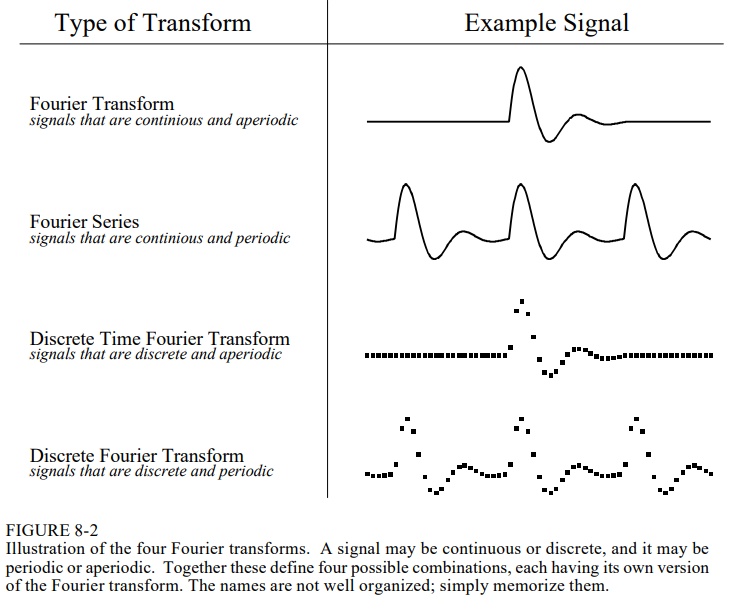

### Limits in Application 

There is not a version of the Fourier Transform that uses finite length signals. The best that can be done is to make the finite data stored in your computer *look like* an infinite signal. This is done by zero padding both sides of the signal to infinity; the signal will look *discrete & aperiodic*, and the DTFT applies. Alternatively, the imagined samples can be a duplication of the signal. Which would make the signal look *discrete & periodic* and the DFT can be used.

As it turns out, an *infinite* number of sinusoids are required to synthesize a signal that is *aperiodic*. This makes it impossible to calculate the Discrete Time Fourier Transform in a computer algorithm. By elimination, the only type of Fourier transform that can be used in DSP is the DFT.

Each of the four Fourier Transforms can be subdivided into **real** and **complex** versions. The real version is the simplest, using ordinary numbers and algebra for the synthesis and decomposition. This chapter will be limited to the **real DFT**, as complex numbers can quickly become overwhelming. The complex Fourier transforms are the realm of those that specialize in
DSP, and are willing to sink to their necks in the swamp of mathematics. If you are so inclined, Chapters 30-33 will take you there. 

## Notation and Format of the Real DFT

<ins>The discrete Fourier transform changes an N point input signal into two N/2+1 point output signals</ins>. The input signal contains the signal being decomposed, while the two output signals contain the amplitudes of the component sine and cosine waves. 

The input signal is said to be in the **time domain**. Of course, any kind of sampled data can be fed into the DFT, regardless of how it was acquired. When you see the term "time domain" in Fourier analysis, it may actually refer to samples taken over time, or it might be a general reference to any discrete signal that is being decomposed.

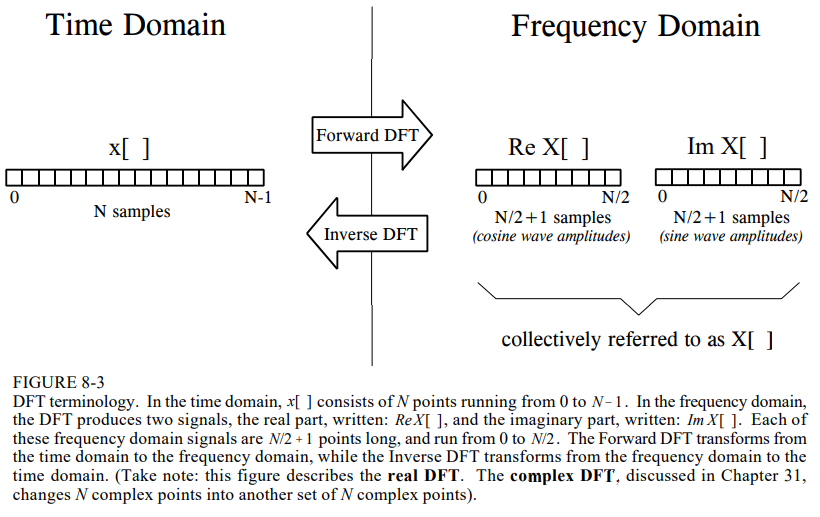

The names *real part* and *imaginary part* originate from the complex DFT, where they are used to distinguish between real and imaginary numbers. Nothing so complicated is required for the real DFT. Until you get to Chapter 31, simply think that "real part" means the cosine wave amplitudes, while "imaginary part" means the sine wave amplitudes. Don't let these suggestive names mislead you; everything here uses ordinary numbers.

Likewise, don't be misled by the *lengths* of the frequency domain signals. It is common in the DSP literature to see statements such as: "The DFT changes an N point time domain signal into an N point frequency domain signal." This is referring to the *complex* DFT, where each "point" is a complex number (consisting of real and imaginary parts). For now, focus on learning the real DFT, the difficult math will come soon enough. 

## DFT Basis Functions

The sine and cosine waves used in the DFT are commonly called the DFT **basis functions**. In other words, the output of the DFT is a set of numbers that represent amplitudes. The basis functions are a set of sine and cosine waves with unity amplitude. If you assign each amplitude (the frequency domain) to the proper sine or cosine wave (the basis functions), the result is a set of scaled sine and cosine waves that can be added to form the time domain signal.

The DFT basis functions are generated from the equations:

$$ c_k[i] = cos(2\pi ki/N) $$
$$ s_k[i] = sin(2\pi ki/N) $$
Where:
$$ i: \{0,\ldots,N-1\} $$
$$ k: \{0,\ldots,N/2\} $$

The parameter, k, sets the frequency of each sinusoid. In particular, c1[ ] is the cosine wave that makes one complete cycle in N points, c5[ ] is the cosine wave that makes five complete cycles in N points, etc. This is an important concept in understanding the basis functions; the frequency parameter, k, is equal to the number of complete cycles that occur over the N points of the signal.

The example below shows some of the 17 sine and 17 cosine waves used in an N = 32 point DFT:

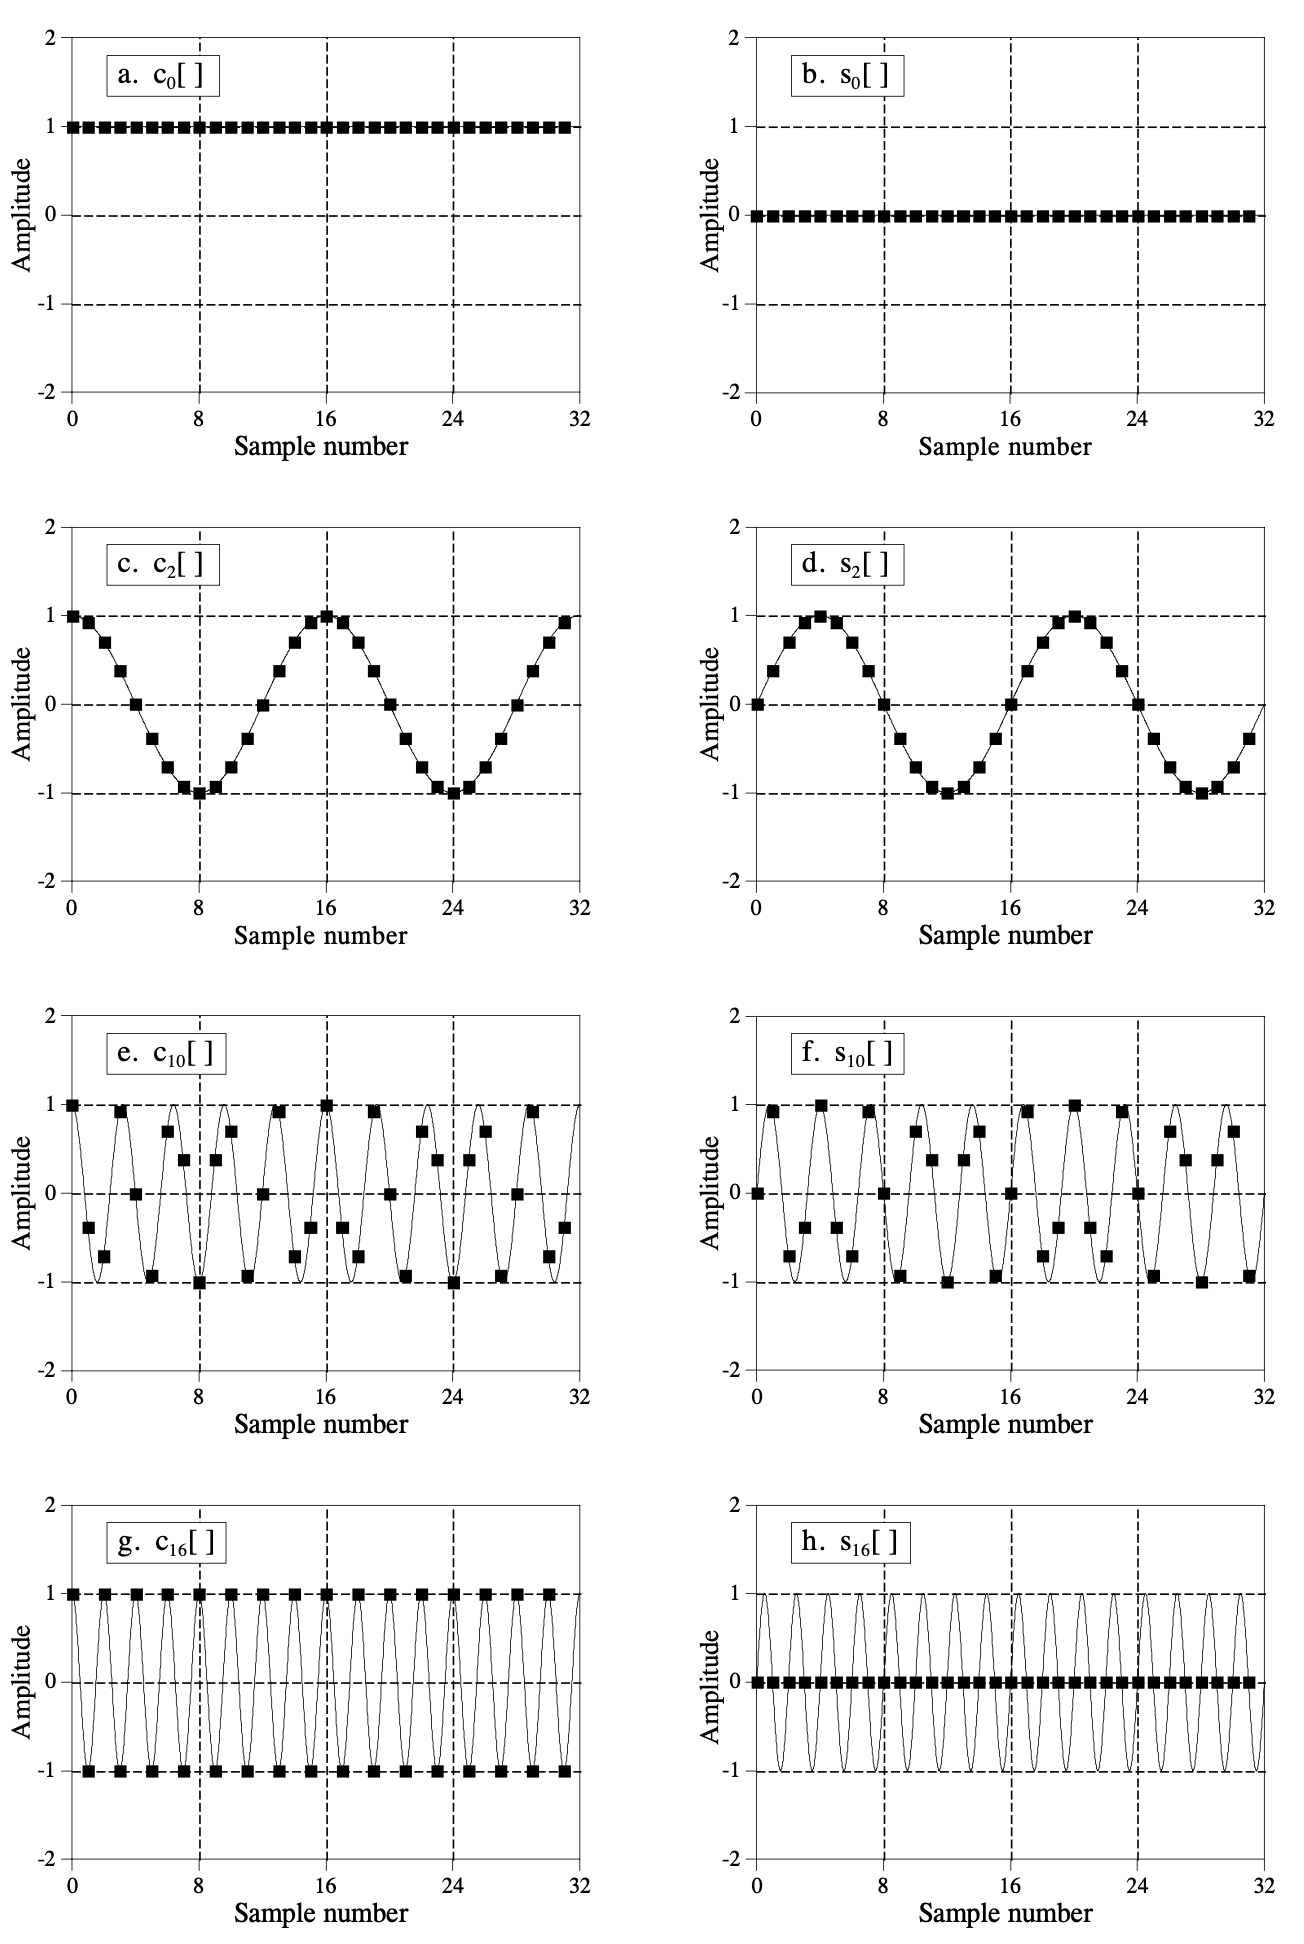

Figure (a) shows the cosine wave c0[ ]. This is a cosine wave of zero frequency, which is a constant value of one. This means that ReX[0] holds the average value of all the points in the time domain signal. In electronics, it would be said that ReX[0] holds the **DC offset**. The sine wave of zero frequency, s0[ ], is shown in (b), a signal composed of all zeros. Since this can not affect the time domain signal being synthesized, the value of Im X [0] is irrelevant, and always set to zero.

Figures (c) & (d) show c2[ ] & s2[ ], the sinusoids that complete *two* cycles in the N points. These correspond to Re(X[2]) & Im(X[2]) , respectively. Likewise, (e) & (f) show c10[ ] & s10[ ], the sinusoids that complete *ten* cycles in the N points. These sinusoids correspond to the amplitudes held in the arrays Re(X[10]) & Im(X[10]) . The problem is, the samples in (e) and (f) no longer look like sine and cosine waves. If the continuous curves were not present in these graphs, you would have a difficult time even detecting the pattern of the waveforms. This may make you a little uneasy, but don't worry about it. From a mathematical point of view, these samples do form discrete sinusoids, even if your eye cannot follow the pattern.

The highest frequencies in the basis functions are shown in (g) and (h). These are c_N/2[ ] & s_N/2[ ], or in this example, c16[ ] & s16[ ]. The discrete cosine wave alternates in value between 1 and -1, which can be interpreted as sampling a continuous sinusoid at the *peaks*. In contrast, the discrete sine wave contains all zeros, resulting from sampling at the zero crossings. This makes the value of ImX[N/2] the same as ImX[0], always equal to zero, and not affecting the synthesis of the time domain signal.

Here's a puzzle: If there are N samples entering the DFT, and N+2 samples exiting, where did the extra information come from? The answer: two of the output samples contain no information, allowing the other N samples to be fully independent. As you might have guessed, the points that carry no information are ImX[0] and ImX[N/2], the samples that always have a value of zero.


## Synthesis, Calculating the Inverse DFT

Pulling together everything said so far, we can write the **synthesis equation**:

$$ x[i] = \sum_{k=0}^{N/2}Re(\bar X[k])cos(2\pi ki/N)+\sum_{k=0}^{N/2}Im(\bar X[k])sin(2\pi ki/N)$$
Where:
$$ i: \{0,\ldots,N-1\} $$
$$ k: \{0,\ldots,N/2\} $$

The amplitudes of the cosine and sine waves are held in the arrays Im(X¯[k)] and Re(X¯[k]), respectively. The synthesis equation multiplies these amplitudes by the basis functions to create a set of scaled sine and cosine waves. Adding the scaled sine and cosine waves produces the time domain signal, x[i].

The arrays are called Im(X¯[k]) and Re(X¯[k]), rather than Im(X[k]) and Re(X[k]). This is because the *amplitudes needed for synthesis* ( Im(X¯[k]) and Re(X¯[k]) ), <ins>are slightly different from the frequency domain of a signal</ins> ( Im(X[k]) and Re(X[k]) ). Although the conversion is only a simple normalization, it is a common bug in computer programs. Look out for it! In equation form, the conversion between the two is given by:

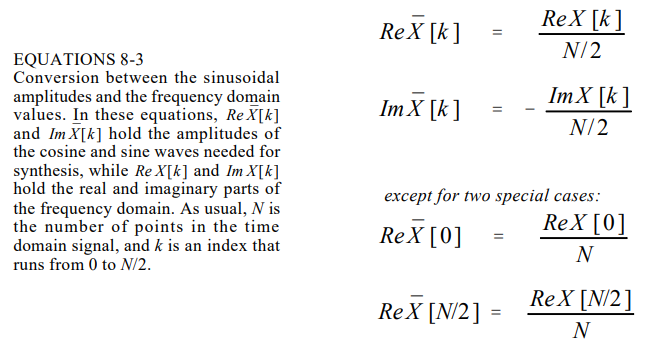

 Given the frequency domain representation ( Im(X[k]) and Re(X[k]) ), the following steps can be performed to synthesize the corresponding time domain signal:
 
 1. Divide all the values in the frequency domain by N/2. 
 2. Change the sign of all the imaginary values. 
 3. Divide the first and last samples in the real part, Re(X[0]) and Re(X[N/2]), by two.

 

## Analysis, Calculating the DFT

The mathematical way to calculate the frequency domain from the time domain is:

$$Re(X[k]) = \sum_{i=0}^{N-1}x[i]cos(2\pi ki/N)$$
$$Im(X[k]) = -\sum_{i=0}^{N-1}x[i]sin(2\pi ki/N)$$
Where:
$$ i: \{0,\ldots,N-1\} $$
$$ k: \{0,\ldots,N/2\} $$

In words, each sample in the frequency domain is found by multiplying the time domain signal by the sine or cosine wave being looked for, and adding the resulting points. <ins>If someone asks you what you are doing, say with confidence: "I am correlating the input signal with each basis function."</ins>

The analysis equation does not require special handling of the first and last points, as did the synthesis equation. There is, however, a negative sign in the imaginary part, which makes the real DFT consistent with the complex DFT, and is not always included. An example is below:

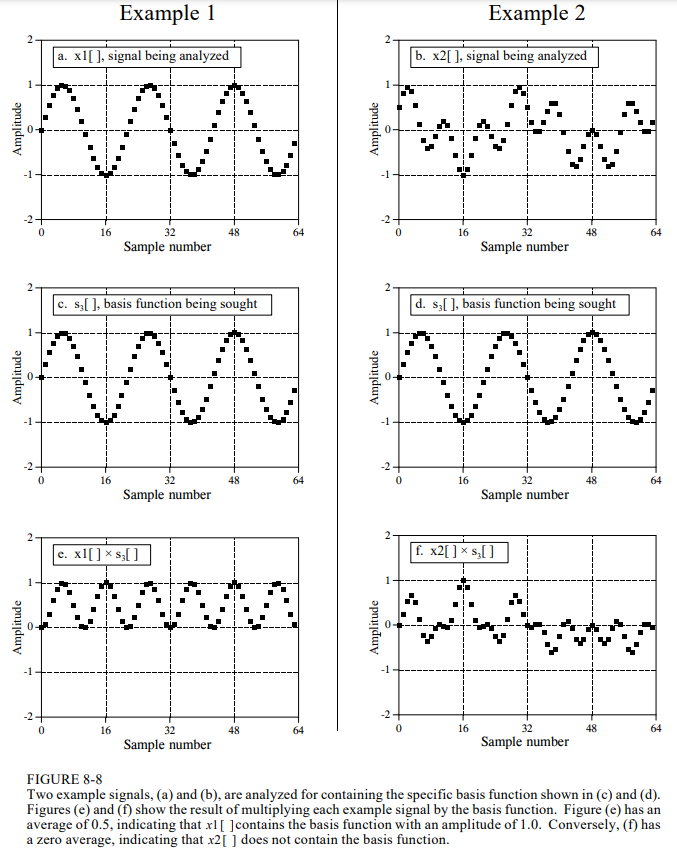

<ins>In order for this correlation algorithm to work, the basis functions must have an interesting property</ins>: each of them must be completely uncorrelated with all of the others. This means that if you multiply any two of the basis functions, the sum of the resulting points will be equal to zero. Basis functions that have this property are called **orthogonal**.

## Polar Notation

So far the frequency domain has been described a group of amplitudes of cosine and sine waves called **rectangular** notation. Consider how the addition of a cosine and sine wave results in a cosine wave with a different amplitude and phase shift:

$$Acos(x)+Bsin(x)=Mcos(x+\phi)$$

The important point is that no information is lost in this process; given one representation you can calculate the other. Although this equation involves sine and cosine waves, it follows the same
conversion equations as simple vectors.

$$M=\sqrt{A^2+B^2}$$
$$\phi=\arctan(B/A)$$

This idea can be extended to write the frequency domain of the signal to **polar** coordinates:

<ins>Rectangular-to-Polar</ins>
$$Mag(X[k])=\sqrt{(Re(X[k])^2+Im(X[k])^2}$$
$$Phase(X[k])=\arctan(\frac{Im(X[k]}{Re(X[k]})$$

<ins>Polar-to-Rectangular</ins>